In [1]:
import numpy as np
from utils import spearman_ci_boot

In [2]:
selected_indices = [0, 2, 22, 25, 41, 44, 63, 68, 81, 85, 101, 120, 122, 140, 142, 161, 180, 187]
selected_indices_v2 = [8, 18, 24, 31, 46, 54, 70, 76, 86, 87, 102, 103, 105, 123, 130, 143, 144, 163, 172, 173, 191, 199]
all_selected_indices = list(sorted(selected_indices + selected_indices_v2))

In [3]:
all_models = ["resnet18", "alexnet", "convnext", "vgg19", "resnet50", "vgg16", "vit", "vit_ssl", "resnet_ssl", "efficientnet", "swin"]

In [4]:
i1_humans = np.load("behavioral_responses/humans/i1_muri1320.npy")
reliabilities_humans = np.load("behavioral_responses/humans/reliabilities_muri1320.npy")

In [5]:
accs = []
accs_std = []
consistencies_h = []
consistencies_err = []
images_indices = ~np.isin(np.arange(1320), all_selected_indices)
for model in all_models:
    i1_clean = np.load(f"./behavioral_responses/{model}/i1_muri1320.npy").mean(axis=1)

    i1_clean_subset = i1_clean[images_indices]
    i1_humans_subset = i1_humans[images_indices] 
    
    corr, el, eh = spearman_ci_boot(i1_clean_subset, i1_humans_subset)

    accs.append(np.nanmean(i1_clean_subset))
    accs_std.append(np.nanstd(i1_clean_subset))
    consistencies_h.append(corr/np.sqrt(np.nanmean(reliabilities_humans)))
    consistencies_err.append((el+el)/2)

In [6]:
best_model_idx = np.argmax(np.array(consistencies_h))
best_model = all_models[best_model_idx]
print(best_model)

convnext


In [7]:
import matplotlib.pyplot as plt
from utils import journal_figure

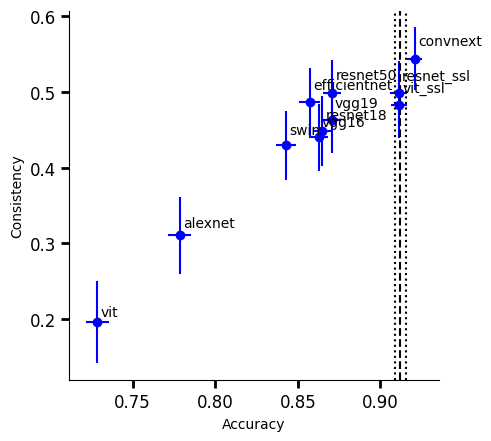

In [8]:
plt.errorbar(accs, consistencies_h, xerr=accs_std/np.sqrt(1280), yerr=consistencies_err, marker='o', color="blue", linestyle='None')

plt.axvline(i1_humans[images_indices].mean(), color="black", linestyle='--', label="Humans")
#rectangle with human std
plt.axvline(i1_humans[images_indices].mean()+np.nanstd(i1_humans[images_indices])/np.sqrt(1280), color="black", linestyle=':')
plt.axvline(i1_humans[images_indices].mean()-np.nanstd(i1_humans[images_indices])/np.sqrt(1280), color="black", linestyle=':')

for i, m in enumerate(all_models):
    plt.text(accs[i]+0.002, consistencies_h[i]/np.sqrt(np.nanmean(reliabilities_humans))+0.0020, m)
    
plt.xlabel("Accuracy")
plt.ylabel("Consistency")
journal_figure()


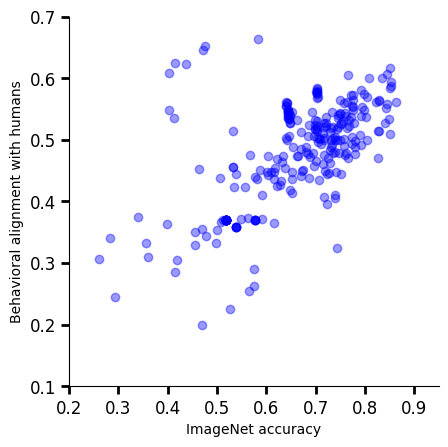

In [9]:
import pandas as pd
bs_data = pd.read_csv("ImageNet-top1_VS_Rajalingham2018-i2n.csv")

accs = []
consistencies = []
for m in bs_data["model"]:
    plt.scatter(bs_data[bs_data["model"] == m]["ImageNet-top1_v1-score"].values, bs_data[bs_data["model"] == m]["Rajalingham2018-i2n_v2-score"].values, color="blue", alpha=.4, zorder=5)
    
    accs.append(np.mean(bs_data[bs_data["model"] == m]["ImageNet-top1_v1-score"].values))
    consistencies.append(np.mean(bs_data[bs_data["model"] == m]["Rajalingham2018-i2n_v2-score"].values))
plt.xlabel("ImageNet accuracy")
plt.ylabel("Behavioral alignment with humans")
plt.xlim(.2, .95)
plt.ylim(.1, .7)
journal_figure()
